In [1]:
import cv2

In [2]:
from deepface import DeepFace

In [3]:
img = cv2.imread('Happy Child.jpeg')

In [4]:
import matplotlib.pyplot as plt

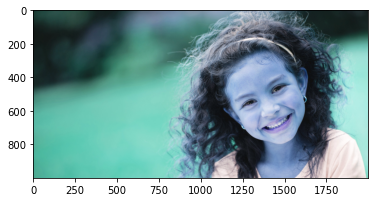

In [5]:
plt.imshow(img)

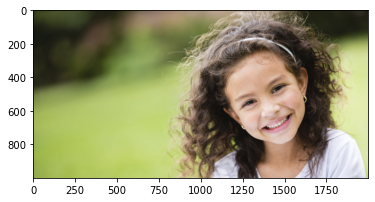

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [7]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  2.00it/s]


In [8]:
predictions

{'emotion': {'angry': 0.01400924604068673,
  'disgust': 7.855303681667986e-09,
  'fear': 11.893773787842619,
  'happy': 75.23149700352532,
  'sad': 2.3142929637010674,
  'surprise': 2.193557415518607,
  'neutral': 8.35287248211339},
 'dominant_emotion': 'happy',
 'region': {'x': 898, 'y': 670, 'w': 49, 'h': 49},
 'age': 25,
 'gender': 'Man',
 'race': {'asian': 18.471503257751465,
  'indian': 8.184150606393814,
  'black': 6.2760040163993835,
  'white': 26.62205994129181,
  'middle eastern': 22.963425517082214,
  'latino hispanic': 17.482857406139374},
 'dominant_race': 'white'}

In [9]:
type(predictions)

dict

In [10]:
predictions['dominant_emotion']

'happy'

In [11]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [12]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces=faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

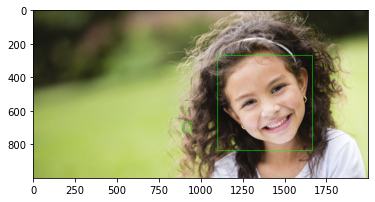

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
font=cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,predictions['dominant_emotion'],
           (50,50),
           font,3,
           (0,255,0),
           2,
           cv2.LINE_4);

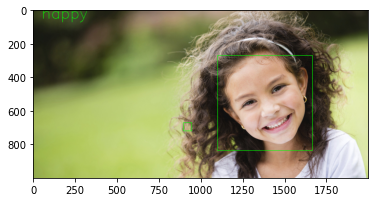

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

Real time Face Emotion recognition

In [ ]:
import cv2

from deepface import DeepFace

faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(1)

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Webcam")

while True:
    ret,frame=cap.read()
    result=DeepFace.analyze(frame,actions=['emotion'])
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        
    font=cv2.FONT_HERSHEY_SIMPLEX  
    
    cv2.putText(frame,result['dominant_emotion'],
           (50,50),
           font,3,
           (0,0,255),
           2,
           cv2.LINE_4);
    cv2.imshow('Original video',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

Action: age:   0%|                                                                               | 0/4 [00:00<?, ?it/s]